## Time comparison for the two method to create the Mandelbrot set

In [1]:
import os
import sys
chaoseverywhere = os.path.abspath(os.path.join('..','..'))
if chaoseverywhere not in sys.path:
    sys.path.append(chaoseverywhere)
import chaoseverywhere as chaos
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
import patsy
import numpy as np
import pandas as pd  
import statsmodels.api as sm
import time
import statsmodels.formula.api as smf

In [29]:
n = np.arange(10,500,20)

[ 10  30  50  70  90 110 130 150 170 190 210 230 250 270 290 310 330 350
 370 390 410 430 450 470 490]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [41]:
n = np.arange(10,500,20)
temps_loop = np.array([0.0]*25)
for i in range(25):
    start = time.time()
    chaos.Mandelbrot_disp(0,0,2, n[i]).mandel_loop()
    end = time.time()
    temps_loop[i] = end - start

In [42]:
df_loop =  pd.DataFrame({'nb_iter':n, 'temps':temps_loop})
reg_loop = smf.ols('temps ~ nb_iter', data=df_loop).fit()
reg_loop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  temps   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     7152.
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           3.43e-30
Time:                        15:27:08   Log-Likelihood:                 17.188
No. Observations:                  25   AIC:                            -30.38
Df Residuals:                      23   BIC:                            -27.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0484      0.051      0.954      0.350      -0.057       0.153
nb_iter        0.0149      0.000     84.568      0.000       0.015       0.015
==============================================================================
Omnibus:                       17.801   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.735
Skew:                           1.448   Prob(JB):                     4.25e-06
Kurtosis:                       6.919   Cond. No.                         578.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
temps_mandel = np.array([0.0]*25)
for i in range(25):
    start = time.time()
    chaos.Mandelbrot_disp(0,0,2, n[i]).mandelbrot()
    end = time.time()
    temps_mandel[i] = end - start

<IPython.core.display.Javascript object>


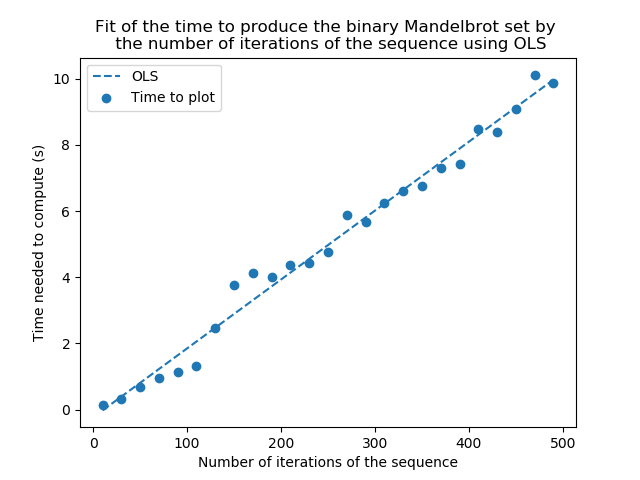

In [47]:
df =  pd.DataFrame({'nb_iter':n, 'temps':temps_mandel})
reg = smf.ols('temps ~ nb_iter', data=df).fit()
reg.summary()

<IPython.core.display.Javascript object>


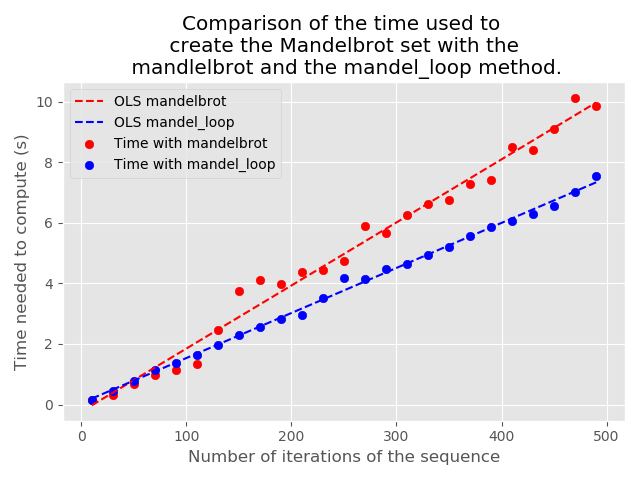

In [72]:
plt.style.use('ggplot')
plt.figure(1)
plt.scatter(df['nb_iter'], df['temps'], label='Time with mandelbrot', color='red')
plt.plot(df['nb_iter'], reg.predict(df), '--', label='OLS mandelbrot', color='red')
plt.scatter(df_loop['nb_iter'], df_loop['temps'], label='Time with mandel_loop', color='blue')
plt.xlabel('Number of iterations of the sequence')
plt.ylabel('Time needed to compute (s)')
plt.plot(df_loop['nb_iter'], reg_loop.predict(df_loop), '--', label='OLS mandel_loop', color='blue')
plt.legend()
plt.title("Comparison of the time used to \n create the Mandelbrot set with the \n mandlelbrot and the mandel_loop method.")
plt.tight_layout()